# Project Predictive modelling: OTT Data Analysis

## Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion in 2019 and is projected to reach $1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

## Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

#### The following questions need to be answered as a part of the EDA section of the project:

* What does the distribution of content views look like?
* What does the distribution of genres look like?
* The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
* How does the viewership vary with the season of release?
* What is the correlation between trailer views and content views?

## Data Description

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

### Data Dictionary:

* visitors: Average number of visitors, in millions, to the platform in the past week
* ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
* major_sports_event: Any major sports event on the day
* genre: Genre of the content
* dayofweek: Day of the release of the content
* season: Season of the release of the content
* views_trailer: Number of views, in millions, of the content trailer
* views_content: Number of first-day views, in millions, of the content

## Data Overview

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

### Understanding the structure of the data

In [2]:
data=pd.read_csv('/Users/ruthwik/Desktop/Great lakes/Files/ottdata.csv')

In [3]:
data.head(5)

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


#### It shows up first 5 records of the data

In [4]:
data.shape

(1000, 8)

In [5]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


## Univariate Analysis

<Axes: xlabel='visitors', ylabel='Count'>

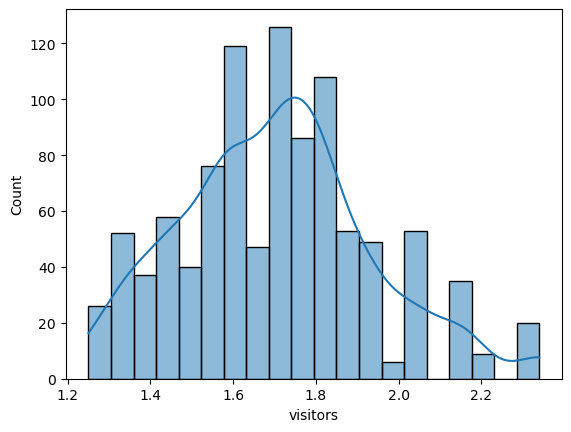

In [7]:
sns.histplot(data,x='visitors',kde=True)

Distribution is right skewed

<Axes: xlabel='visitors'>

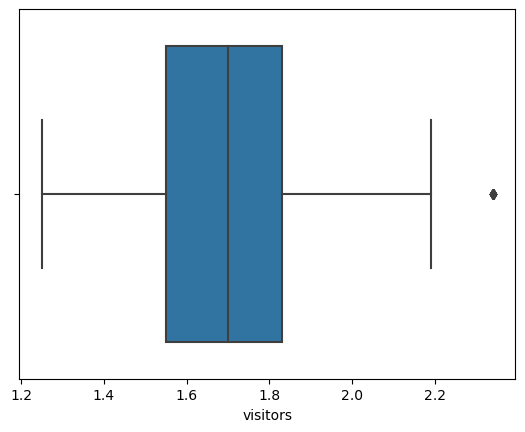

In [8]:
sns.boxplot(data,x='visitors')

Median is at 1.7

<Axes: xlabel='ad_impressions', ylabel='Count'>

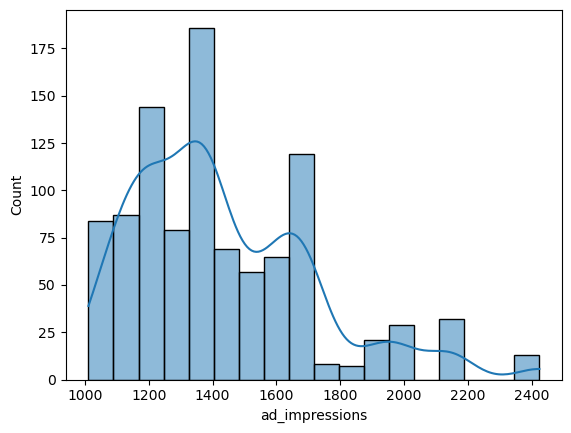

In [9]:
sns.histplot(data,x='ad_impressions',kde=True)

Data is not normally distributed and right skewed

<Axes: xlabel='ad_impressions'>

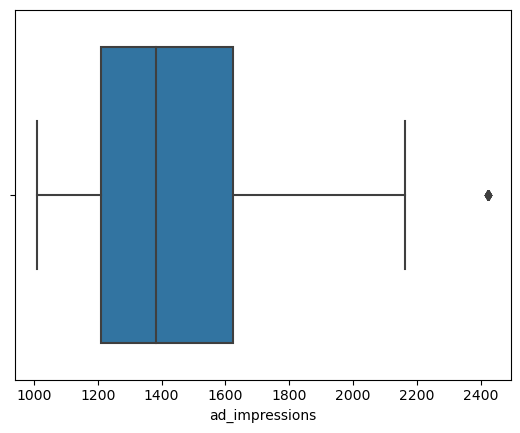

In [10]:
sns.boxplot(data,x='ad_impressions')

Data is right skewed and median is at 1390

<Axes: xlabel='views_trailer', ylabel='Count'>

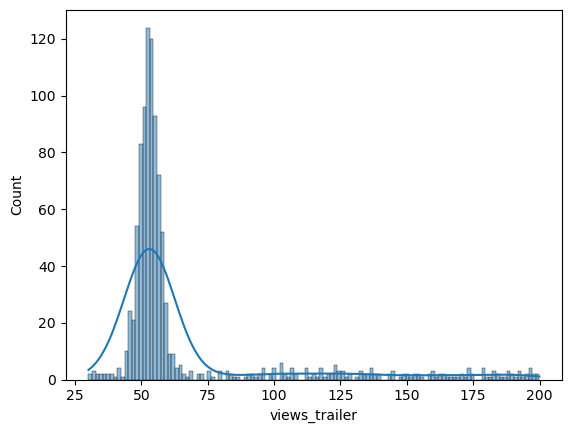

In [11]:
sns.histplot(data,x='views_trailer',kde=True)

<Axes: xlabel='views_trailer'>

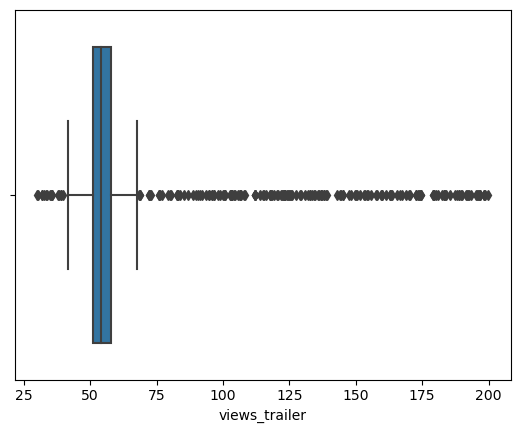

In [12]:
sns.boxplot(data,x='views_trailer')

There are so many outliers present in the data

<Axes: xlabel='views_content', ylabel='Count'>

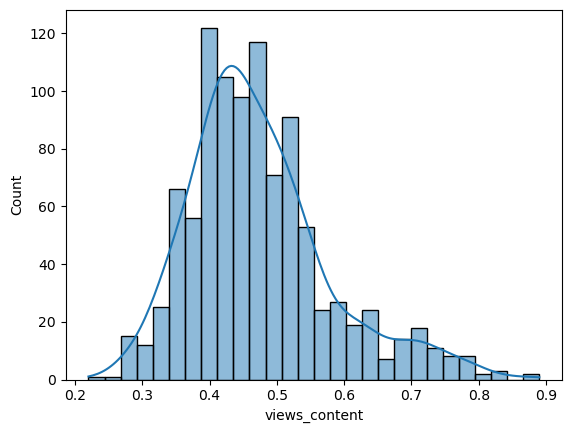

In [13]:
sns.histplot(data,x='views_content',kde=True)

Data is normally distributed but slightly skewed to right

<Axes: xlabel='views_content'>

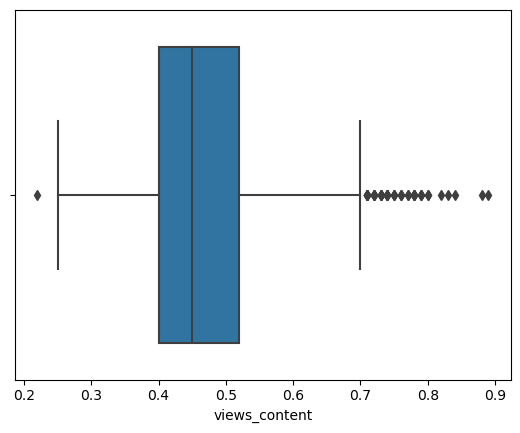

In [14]:
sns.boxplot(data,x='views_content')

Distribution shows the outliers extended at the right tail

<Axes: xlabel='major_sports_event', ylabel='count'>

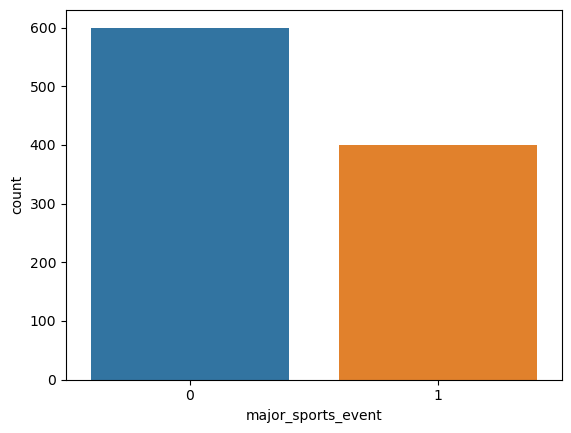

In [15]:
sns.countplot(data,x='major_sports_event')

Sports event is affecting the views on the content

<Axes: xlabel='genre', ylabel='count'>

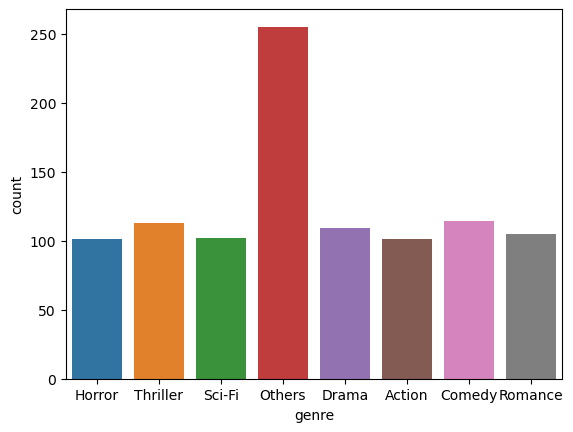

In [16]:
sns.countplot(data,x='genre')

<Axes: xlabel='dayofweek', ylabel='count'>

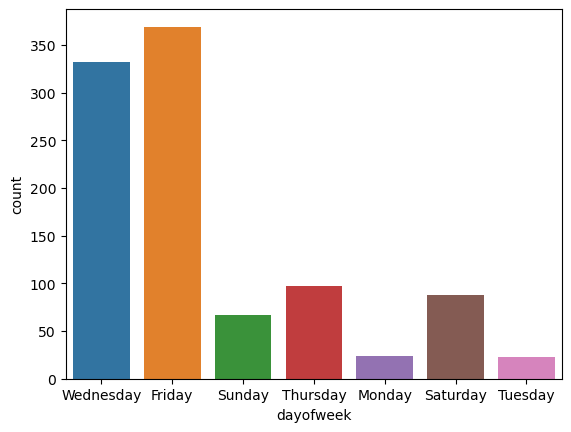

In [17]:
sns.countplot(data,x='dayofweek')

<Axes: xlabel='season', ylabel='count'>

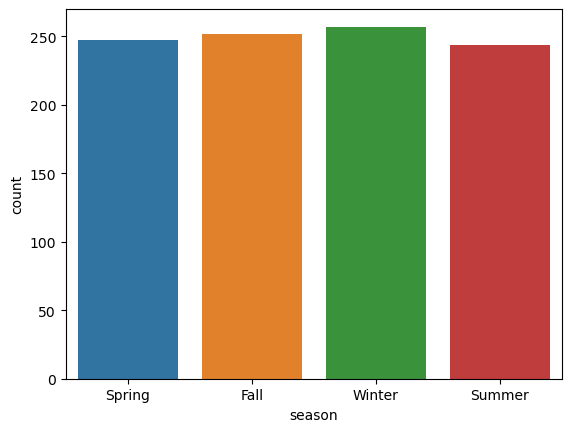

In [18]:
sns.countplot(data,x='season')

## Bivariate Analysis
### Correlation of Numerical variables

/var/folders/vm/tzcnkzf15f90ll2ywxlr43nr0000gn/T/ipykernel_7593/3011153284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= sns.heatmap(data.corr(),annot=True, cmap='Spectral',vmin=-1,vmax=1)


<Axes: >

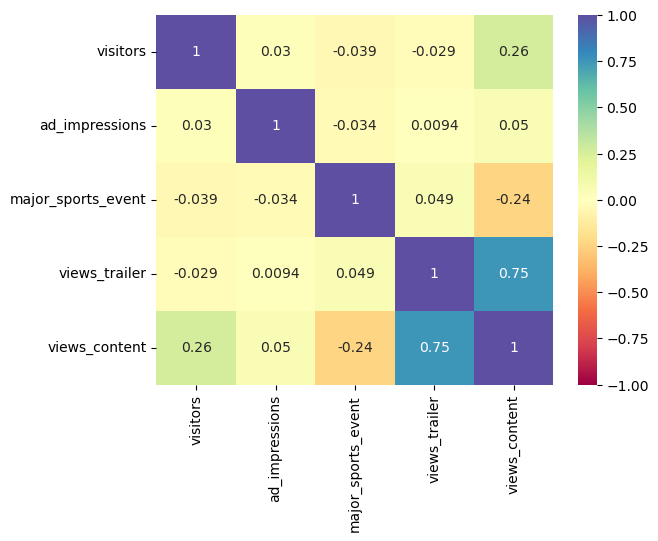

In [19]:
correlation= sns.heatmap(data.corr(),annot=True, cmap='Spectral',vmin=-1,vmax=1)
correlation

### Relationship between numerical variables

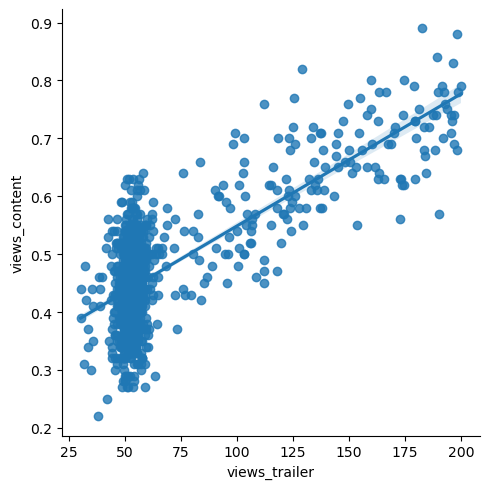

In [20]:
sns.lmplot(data,x='views_trailer',y='views_content')

<Axes: xlabel='ad_impressions', ylabel='views_content'>

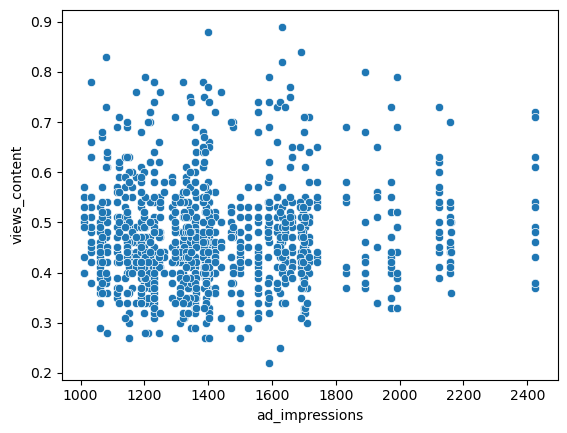

In [21]:
sns.scatterplot(data,x='ad_impressions',y='views_content')

<Axes: xlabel='ad_impressions', ylabel='views_trailer'>

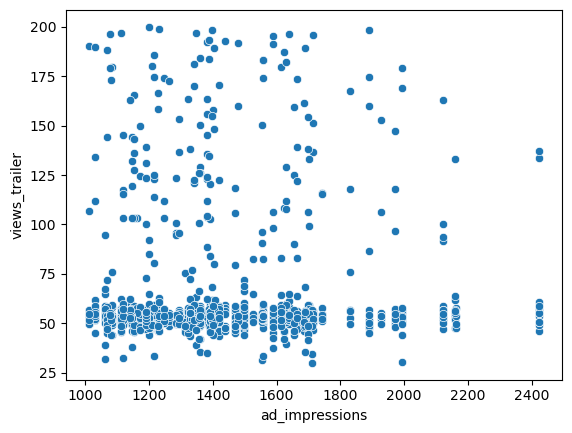

In [22]:
sns.scatterplot(data,x='ad_impressions',y='views_trailer')

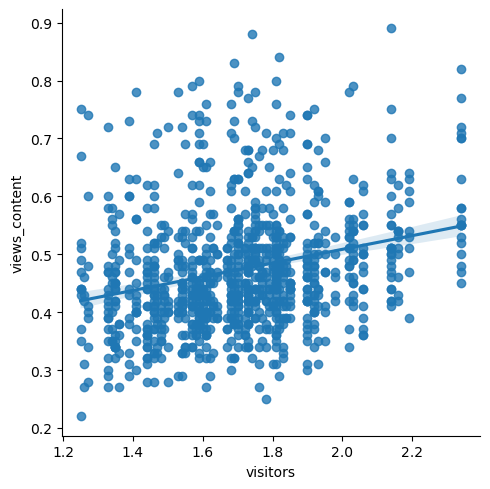

In [23]:
sns.lmplot(data,x='visitors',y='views_content')

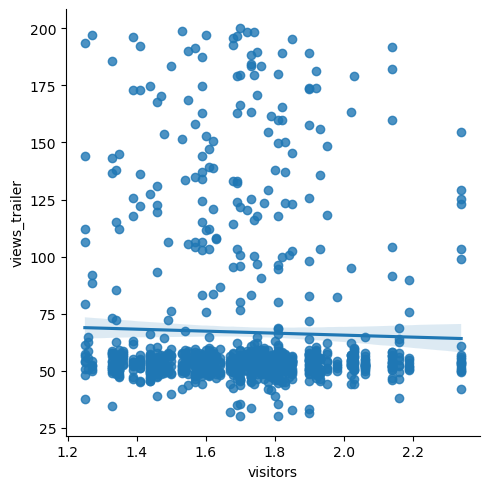

In [24]:
sns.lmplot(data,x='visitors',y='views_trailer')

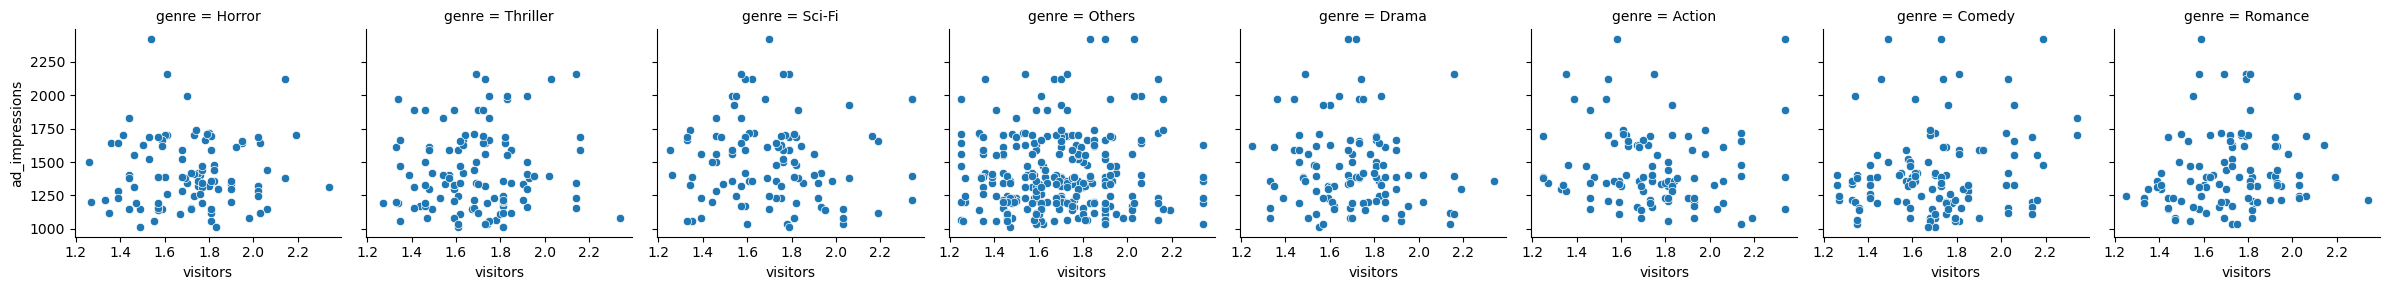

In [25]:
r=sns.FacetGrid(data, col = "genre")
r.map(sns.scatterplot, 'visitors', 'ad_impressions')

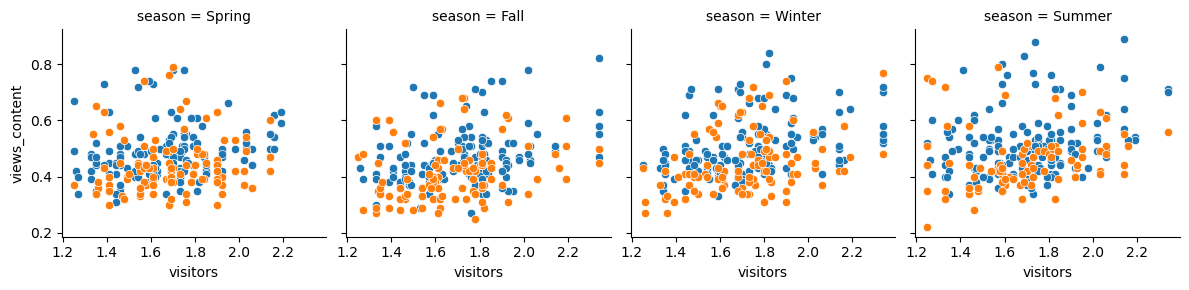

In [26]:
r=sns.FacetGrid(data, col = "season", hue ='major_sports_event')
r.map(sns.scatterplot, 'visitors', 'views_content')

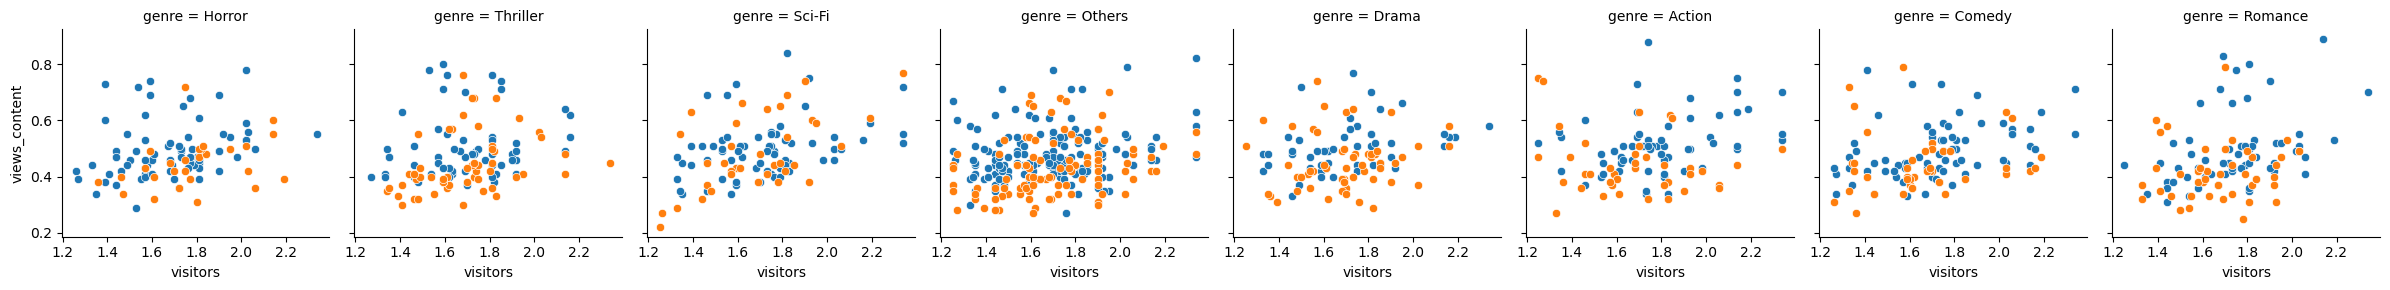

In [27]:
r=sns.FacetGrid(data, col = "genre", hue ='major_sports_event')
r.map(sns.scatterplot, 'visitors', 'views_content')

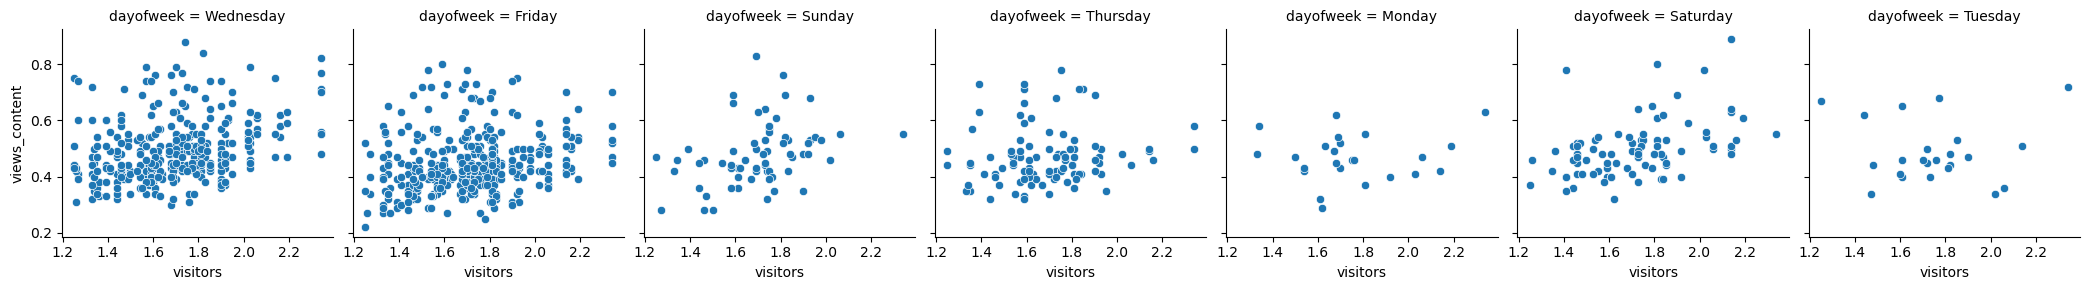

In [28]:
r=sns.FacetGrid(data, col = "dayofweek")
r.map(sns.scatterplot, 'visitors', 'views_content')

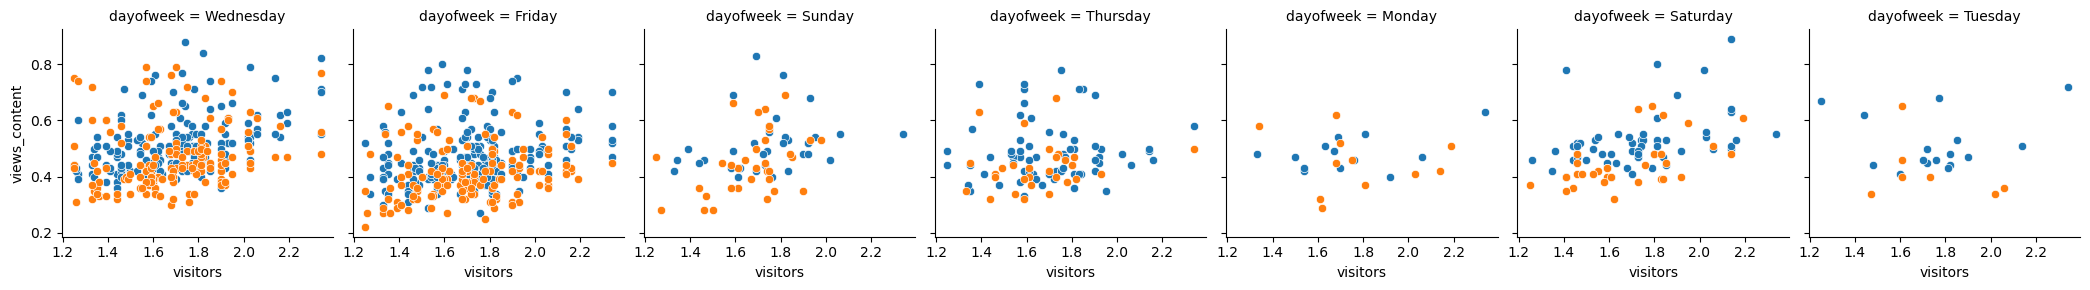

In [29]:
r=sns.FacetGrid(data, col = "dayofweek", hue='major_sports_event')
r.map(sns.scatterplot, 'visitors', 'views_content')

<Axes: xlabel='visitors', ylabel='ad_impressions'>

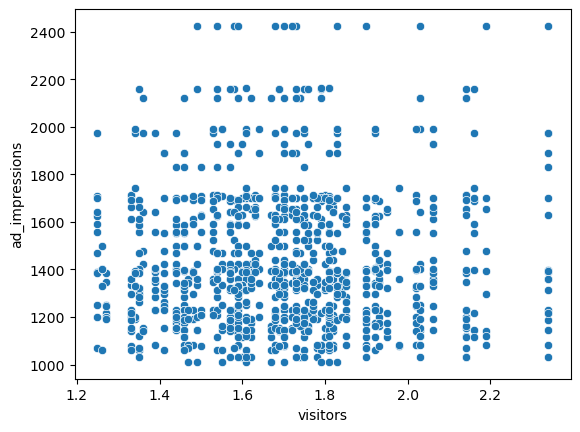

In [30]:
sns.scatterplot(data,x='visitors',y='ad_impressions')

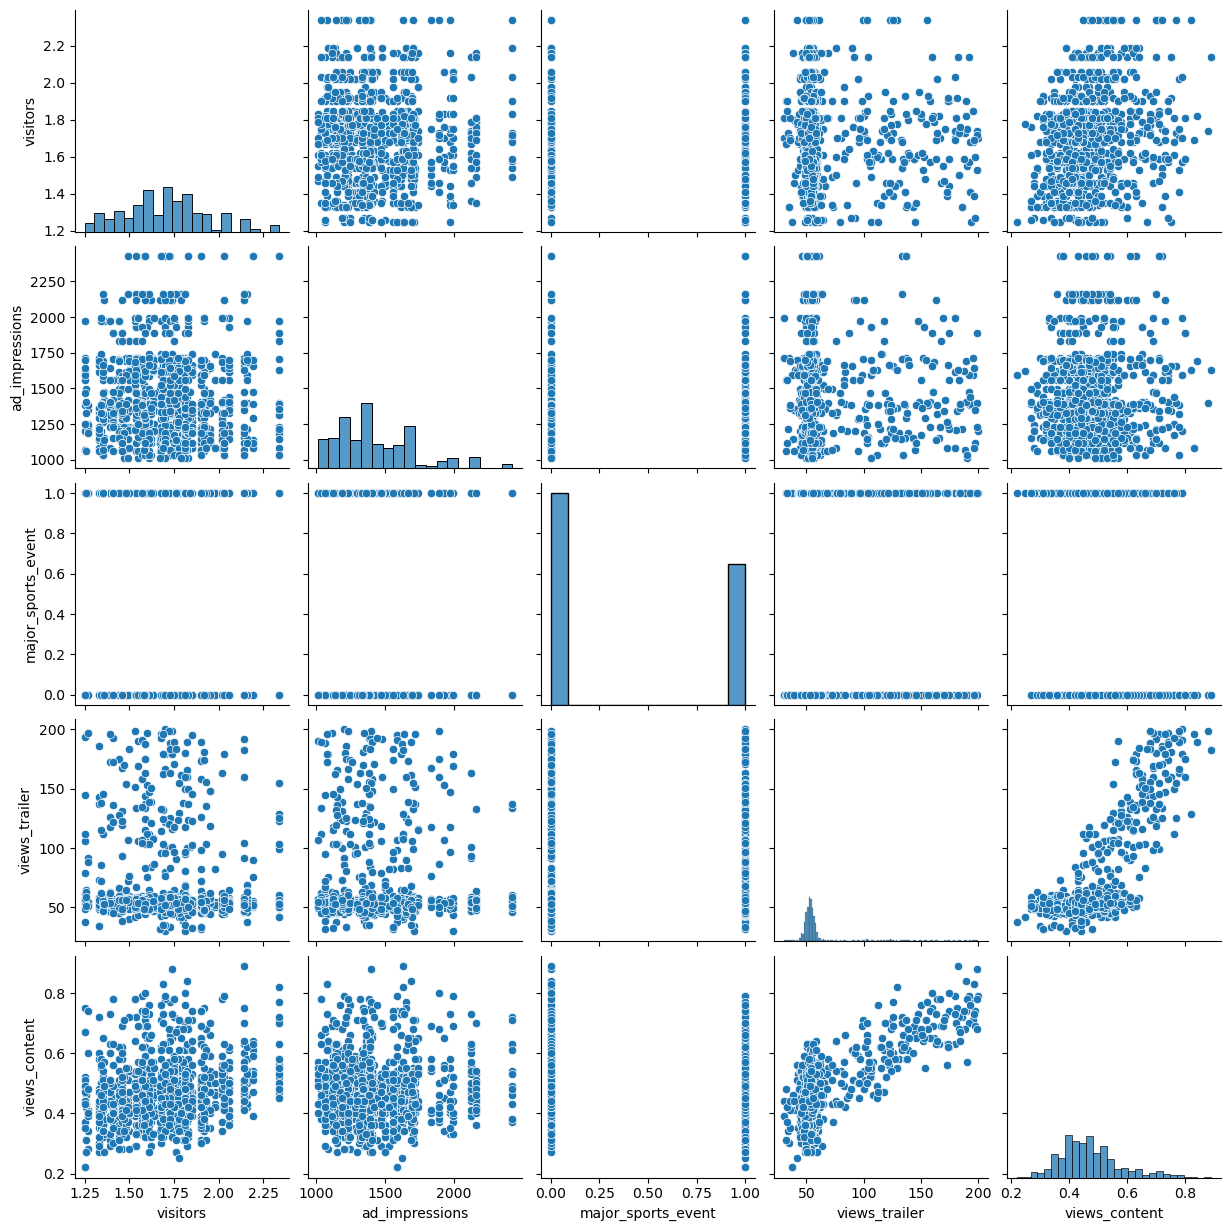

In [31]:
sns.pairplot(data)

### Relationship between numerical and categorical variables

<Axes: xlabel='genre', ylabel='visitors'>

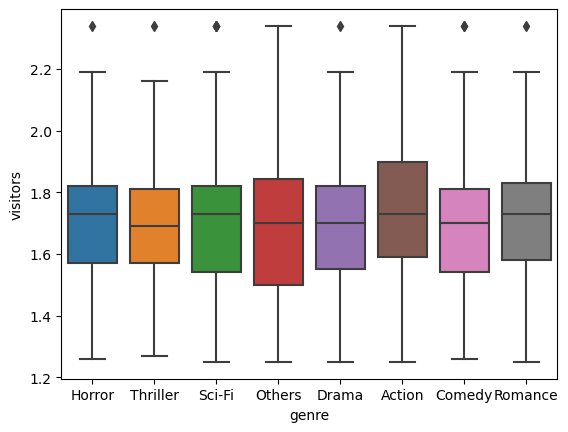

In [32]:
sns.boxplot(data,x='genre',y='visitors')

<Axes: xlabel='genre', ylabel='views_content'>

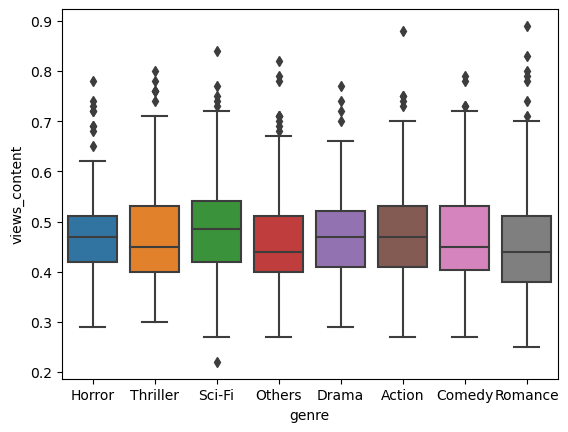

In [33]:
sns.boxplot(data,x='genre',y='views_content')

<Axes: xlabel='genre', ylabel='views_trailer'>

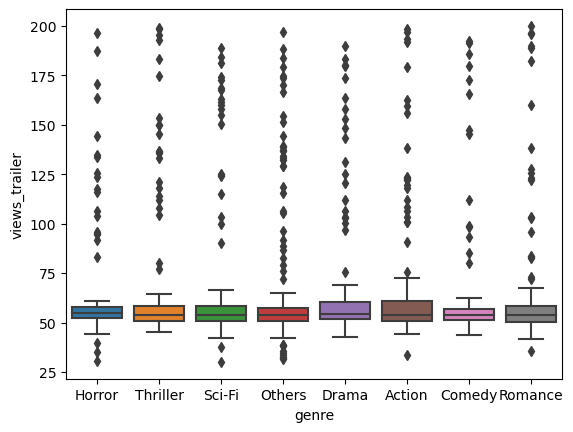

In [34]:
sns.boxplot(data,x='genre',y='views_trailer')

<Axes: xlabel='dayofweek', ylabel='views_trailer'>

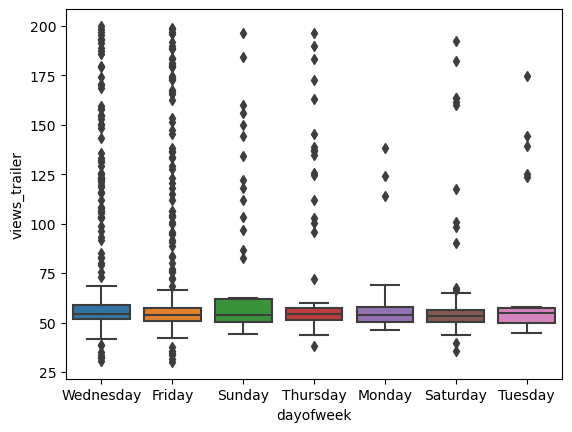

In [35]:
sns.boxplot(data,x='dayofweek',y='views_trailer')

<Axes: xlabel='dayofweek', ylabel='views_content'>

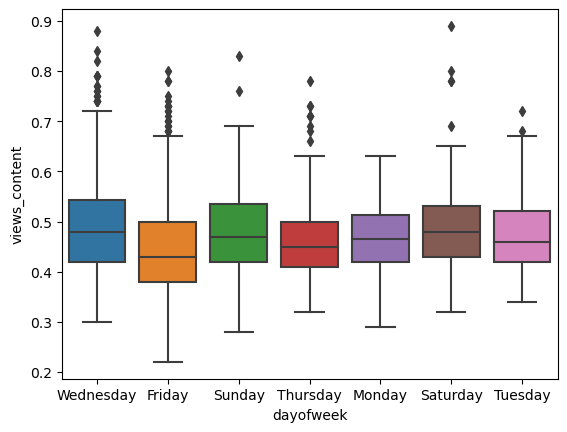

In [36]:
sns.boxplot(data,x='dayofweek',y='views_content')

<Axes: xlabel='dayofweek', ylabel='visitors'>

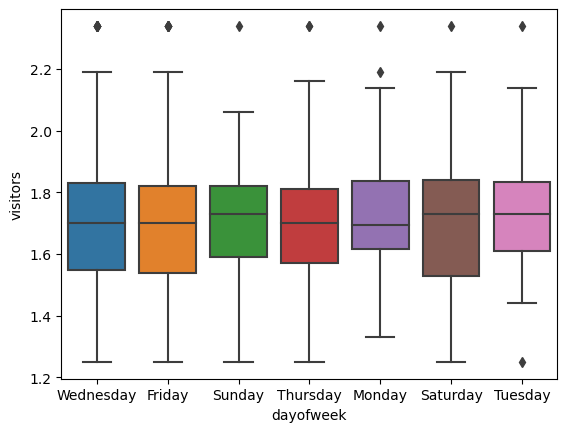

In [37]:
sns.boxplot(data,x='dayofweek',y='visitors')

<Axes: xlabel='season', ylabel='views_trailer'>

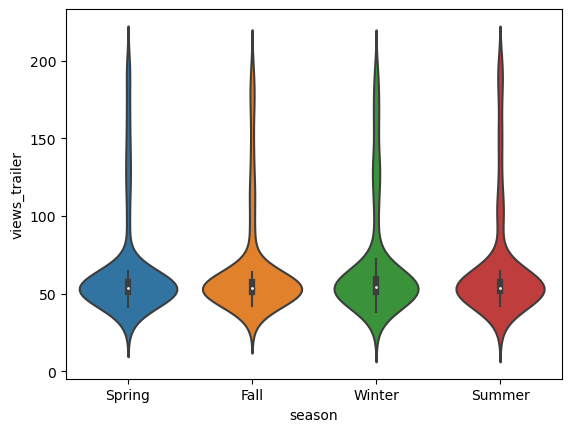

In [38]:
sns.violinplot(data,x='season',y='views_trailer')

<Axes: xlabel='season', ylabel='views_content'>

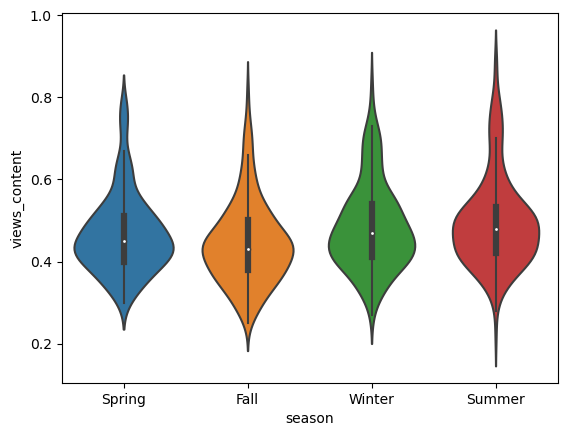

In [39]:
sns.violinplot(data,x='season',y='views_content')

<Axes: xlabel='season', ylabel='visitors'>

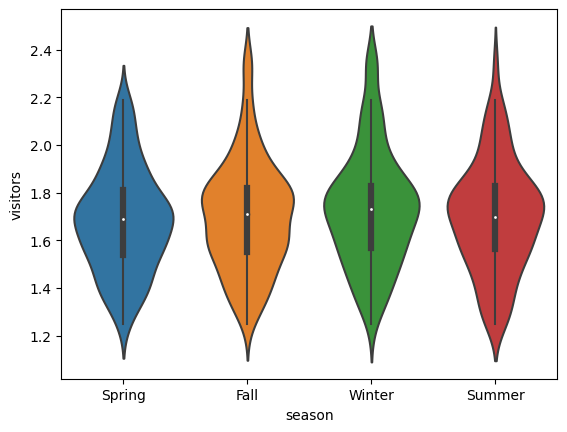

In [40]:
sns.violinplot(data,x='season',y='visitors')

## Answers to the key questions provided

1) What does the distribution of content views look like?

<Axes: xlabel='views_content', ylabel='Count'>

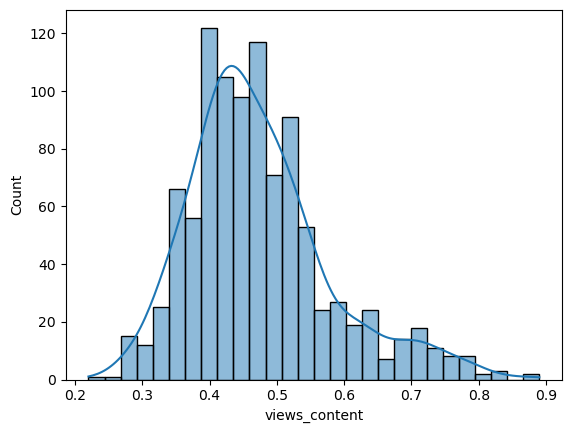

In [41]:
sns.histplot(data,x='views_content',kde=True)

The distribution of content views is almost normally distributed but the data is slightly right skewed to the right tail. The median of the distribution of content views is 0.45 and few outliers are present at the right end.

2) What does the distribution of genres look like?

<Axes: xlabel='genre', ylabel='count'>

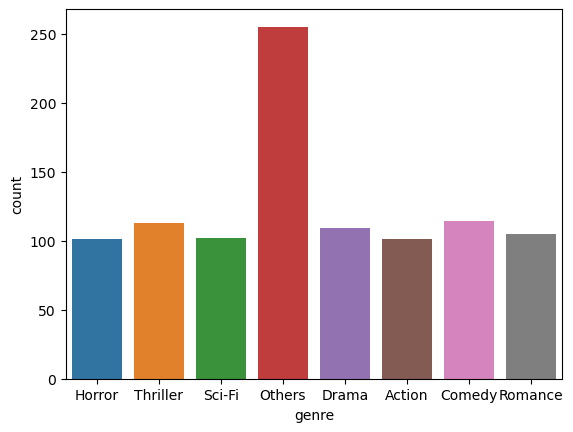

In [42]:
sns.countplot(data,x='genre')

3) The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

<Axes: xlabel='dayofweek', ylabel='views_content'>

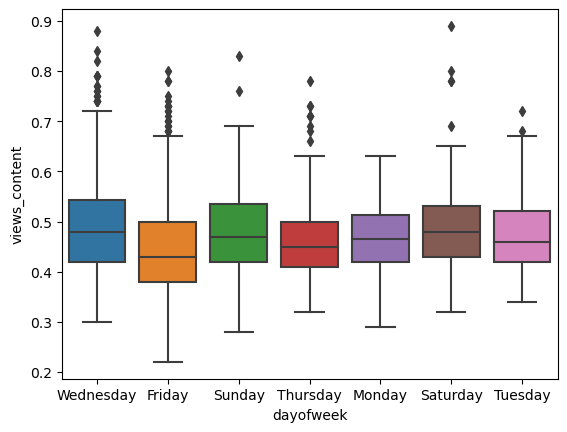

In [43]:
sns.boxplot(data,x='dayofweek',y='views_content')

4) How does the viewership vary with the season of release?

<Axes: xlabel='season', ylabel='views_content'>

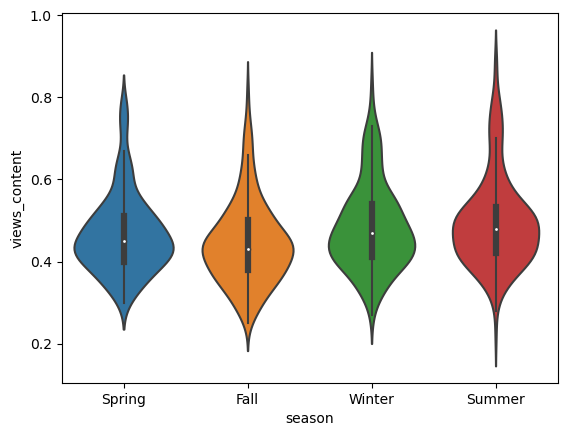

In [44]:
sns.violinplot(data,x='season',y='views_content')

5) What is the correlation between trailer views and content views?

In [45]:
correlation= data['views_trailer'].corr(data['views_content'])
print('Correlation between trailer views and content views is',correlation)

Correlation between trailer views and content views is 0.7539622148205363


# Data preprocessing
## Duplicate value check

In [46]:
data[data.duplicated].count()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

#### There are no duplicate values

## Missing value treatment

In [47]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

#### There are no missing values present in the data

## Feature engineering

In [48]:
data = pd.get_dummies(data, columns=['genre', 'dayofweek', 'season'], drop_first=True)
data.shape

(1000, 21)

In [49]:
data.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0,56.70,0.51,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,1,52.69,0.32,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,1,48.74,0.39,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,1,49.81,0.44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,0,55.83,0.46,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Data preparation for modeling

In [50]:
# Splitting the data
# independent variables
X = data.drop ( "views_content", axis=1)
# dependent variable
y = data [ "views_content"]

In [51]:
X=sm.add_constant(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# Model building - Linear Regression

## Building the model

In [53]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [54]:
#Regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 08 Sep 2024   Prob (F-statistic):          1.32e-215
Time:                        22:28:21   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

### Model statistics
* The OLS regression model explains a significant portion of the variance in the dependent variable views_content, with an R-squared value of 0.792 and an adjusted R-squared of 0.785. This indicates that approximately 79.2% of the variability in views_content can be explained by the model's predictors. 
* The model's F-statistic is 129.0, and its associated p-value is extremely low (1.32e-215), suggesting that the model is statistically significant overall. 
* The model has 700 observations, with 679 degrees of freedom for the residuals and 20 for the model. The log-likelihood of the model is 1124.6, while the AIC and BIC are -2207.0 and -2112.0, respectively, indicating a good fit.

* Several predictors are statistically significant at the 5% level. For instance, visitors has a coefficient of 0.1295 (p < 0.001), implying that an increase in visitors is positively associated with views_content. On the contrary, major_sports_event has a negative coefficient of -0.0603 (p < 0.001), suggesting that such events negatively impact views_content. Other significant variables include views_trailer (coefficient: 0.0023, p < 0.001), certain days of the week (e.g., dayofweek_Monday with a coefficient of 0.0337, p = 0.005, and dayofweek_Saturday with a coefficient of 0.0579, p < 0.001), and seasons (e.g., season_Summer with a coefficient of 0.0442, p < 0.001). 
* The model appears robust, with a Durbin-Watson statistic of 2.004, indicating no significant autocorrelation, and the residuals are normally distributed, as suggested by the Omnibus and Jarque-Bera test statistics (p-values of 0.146 and 0.156, respectively). The condition number of 1.67e+04 indicates some potential multicollinearity but not at a highly concerning level.

In [55]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                  99.679317
visitors                1.027837
ad_impressions          1.029390
major_sports_event      1.065689
views_trailer           1.023551
genre_Comedy            1.917635
genre_Drama             1.926699
genre_Horror            1.904460
genre_Others            2.573779
genre_Romance           1.753525
genre_Sci-Fi            1.863473
genre_Thriller          1.921001
dayofweek_Monday        1.063551
dayofweek_Saturday      1.155744
dayofweek_Sunday        1.150409
dayofweek_Thursday      1.169870
dayofweek_Tuesday       1.062793
dayofweek_Wednesday     1.315231
season_Spring           1.541591
season_Summer           1.568240
season_Winter           1.570338
dtype: float64



#### There is no multicollinearity in any variable because the VIF values are below 5 for every variable

## Display model coefficients with column names

In [56]:
coefficients = pd.DataFrame({
    'Coefficient': olsres.params
})

print(coefficients)

                     Coefficient
const                   0.060157
visitors                0.129451
ad_impressions          0.000004
major_sports_event     -0.060326
views_trailer           0.002330
genre_Comedy            0.009352
genre_Drama             0.012625
genre_Horror            0.009862
genre_Others            0.006325
genre_Romance           0.000551
genre_Sci-Fi            0.013143
genre_Thriller          0.008708
dayofweek_Monday        0.033662
dayofweek_Saturday      0.057887
dayofweek_Sunday        0.036321
dayofweek_Thursday      0.017289
dayofweek_Tuesday       0.022837
dayofweek_Wednesday     0.047376
season_Spring           0.022602
season_Summer           0.044203
season_Winter           0.027161


# Testing the assumptions of linear regression model

In [68]:
data_pred = pd.DataFrame()

data_pred["Actual Values"] = y_train.values.flatten()  # actual values
data_pred["Fitted Values"] = olsres.fittedvalues.values  # predicted values
data_pred["Residuals"] = olsres.resid.values  # residuals

data_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.40,0.452102,-0.052102
1,0.70,0.679675,0.020325
2,0.42,0.431537,-0.011537
3,0.55,0.562329,-0.012329
4,0.59,0.552069,0.037931


## TEST FOR LINEARITY AND INDEPENDENCE

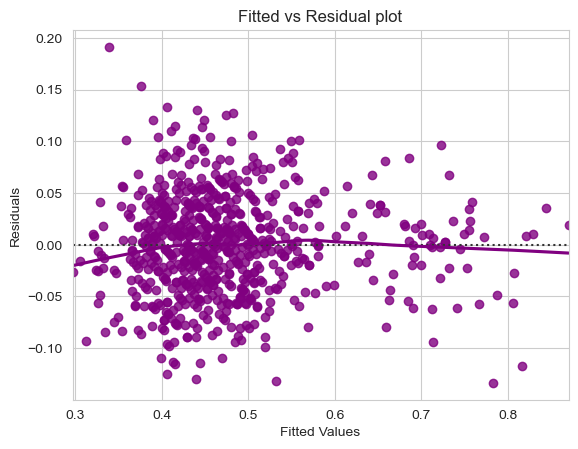

In [69]:
sns.set_style("whitegrid")
sns.residplot(
    data=data_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The residuals in the plot seem randomly scattered around zero, which is a good sign of linearity. If a pattern (e.g., a U-shape) is present, it suggests that the relationship may not be entirely linear, and transformations of variables may be needed.

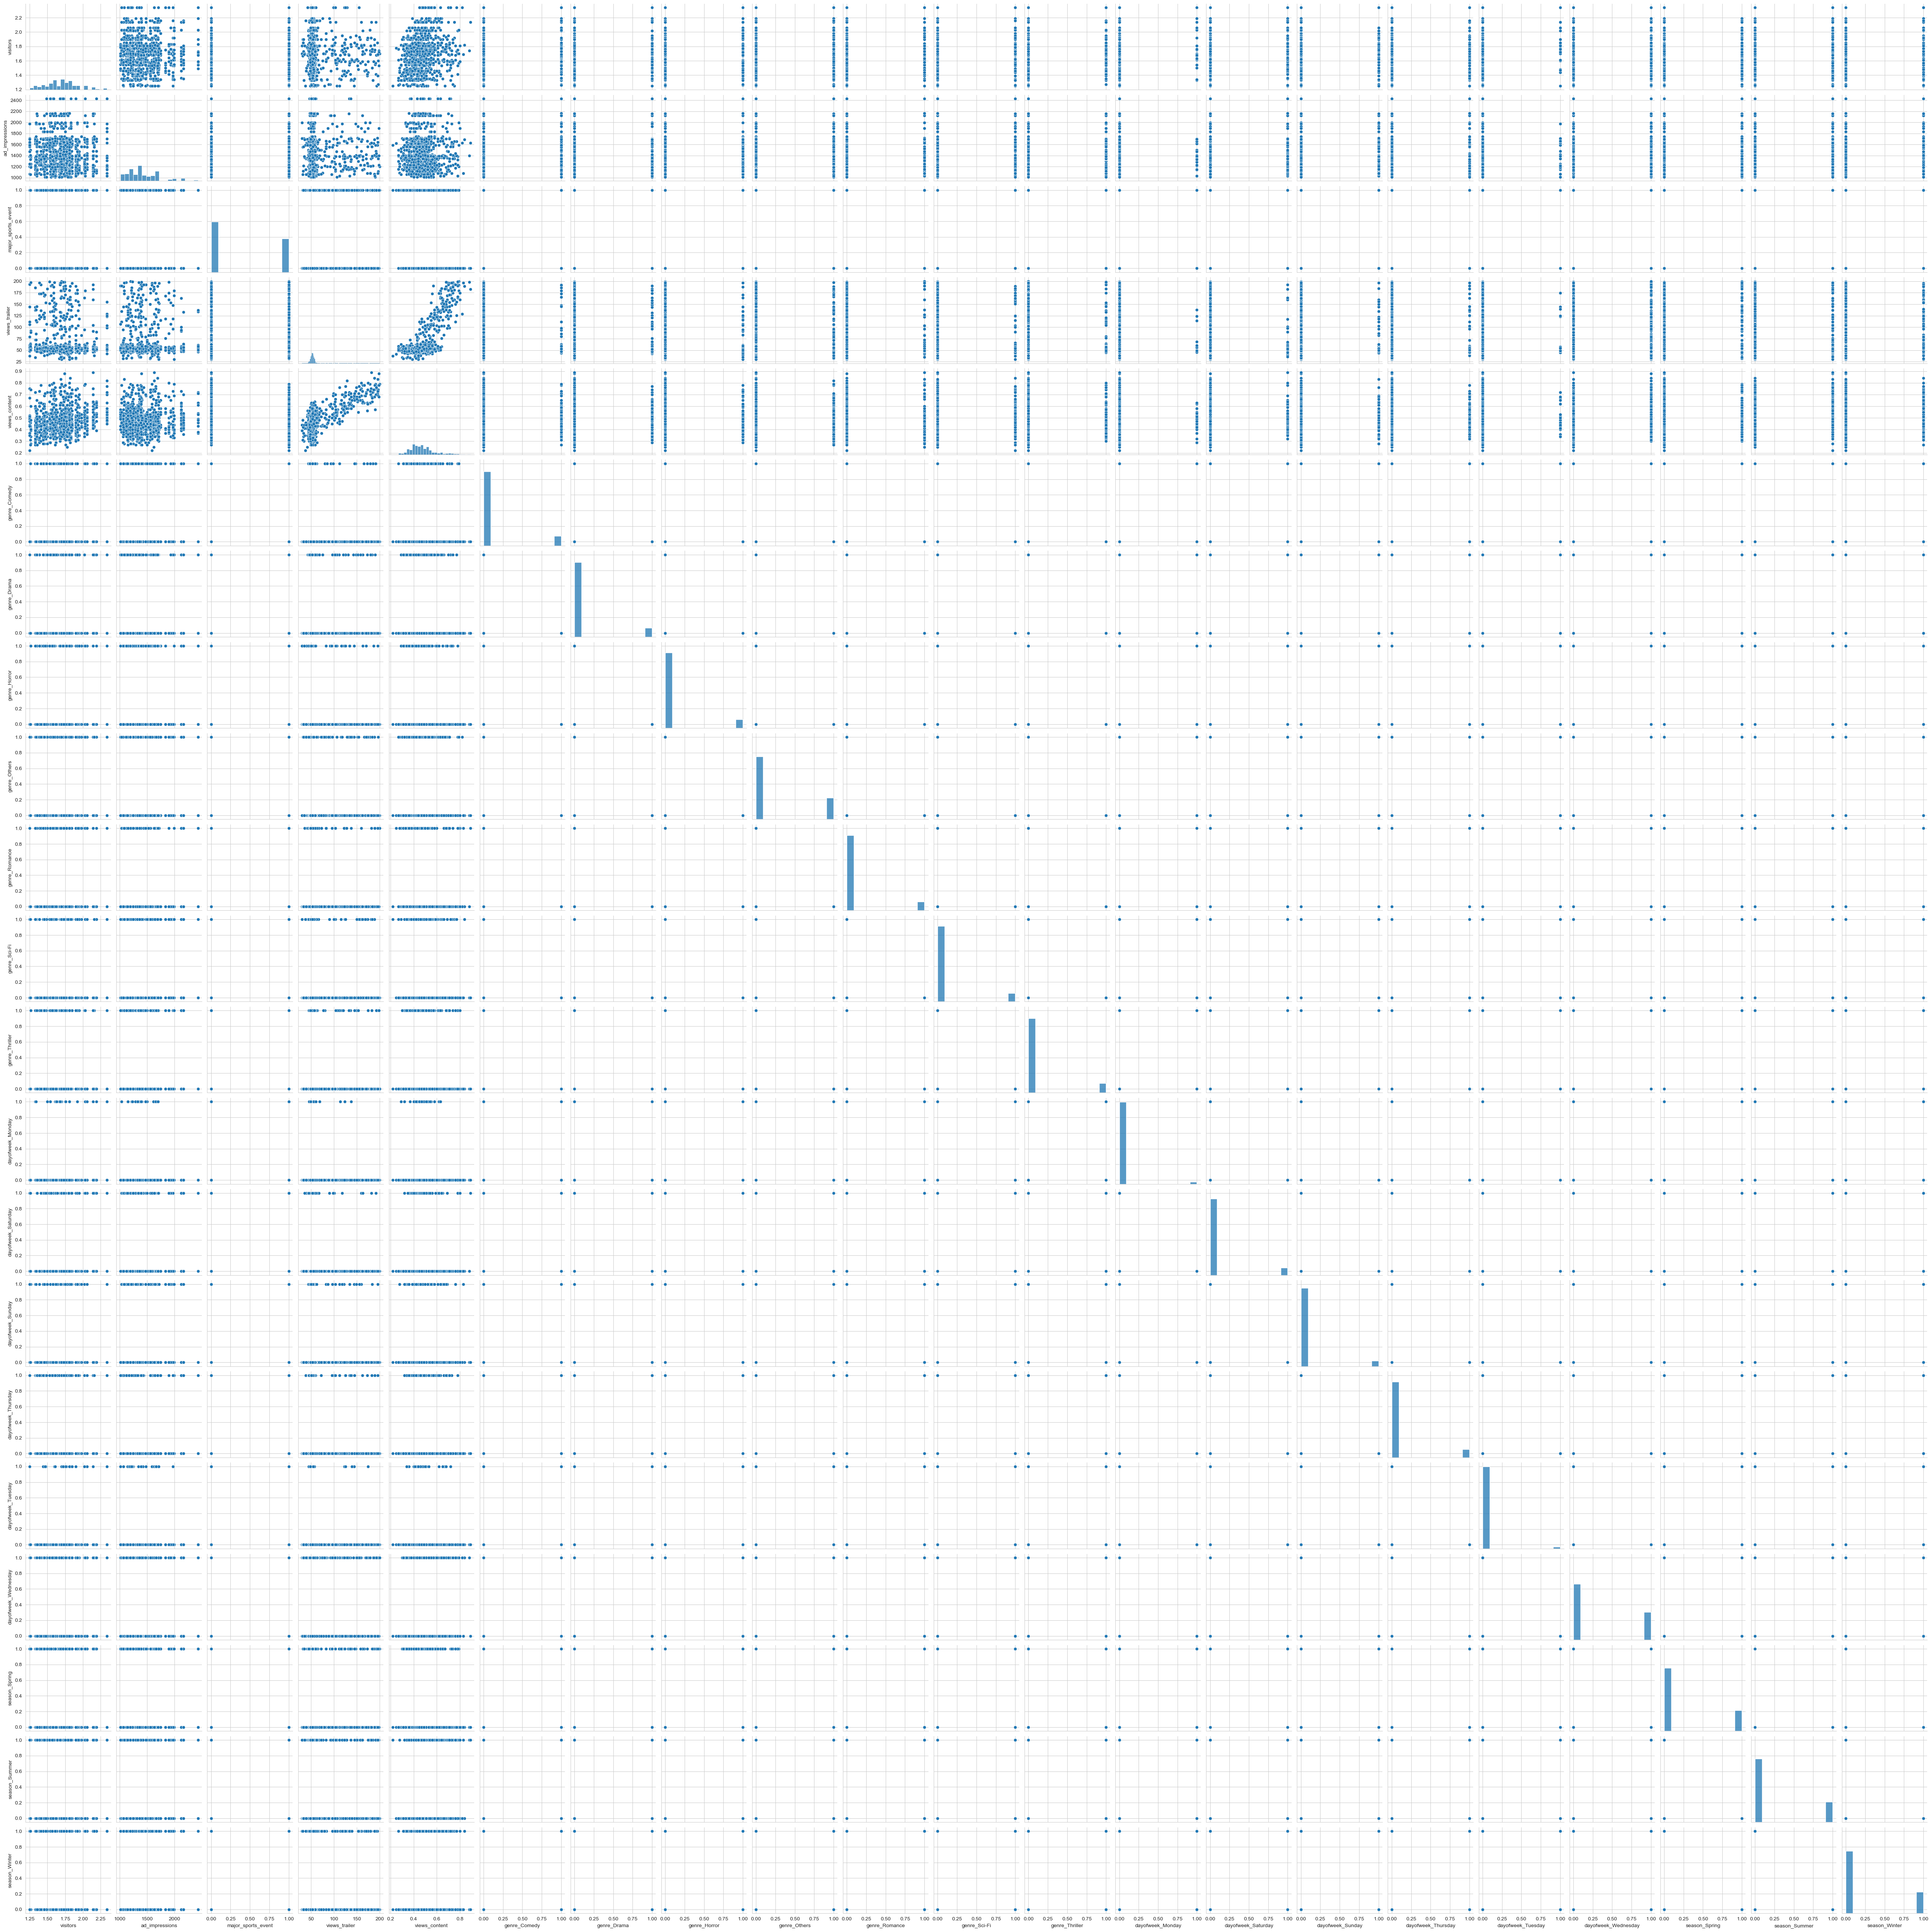

In [70]:
sns.pairplot(data)

## TEST FOR NORMALITY

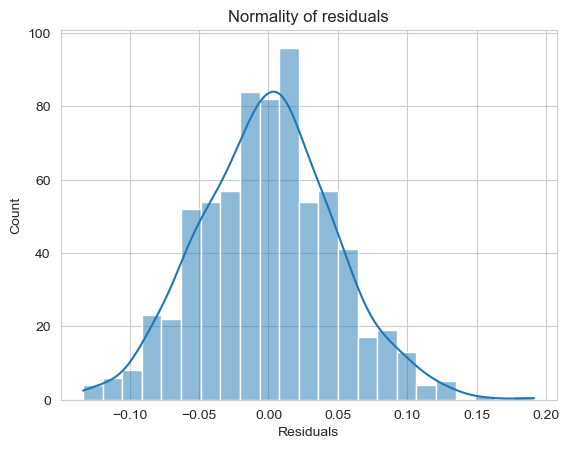

In [71]:
sns.histplot(data_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

The histogram looks approximately normal, but there might be slight deviations at the tails.

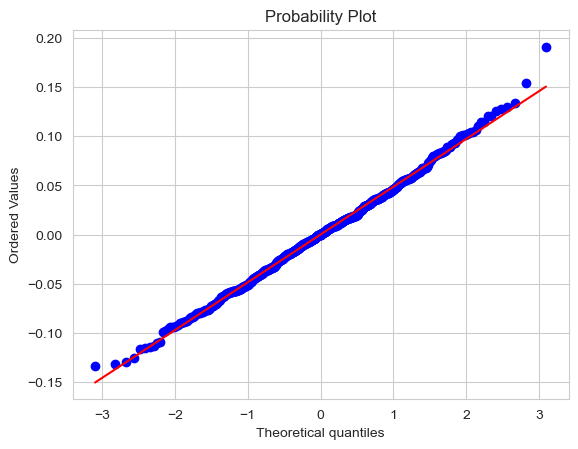

In [72]:
import pylab
import scipy.stats as stats

stats.probplot(data_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The points in the Q-Q plot mostly follow the 45-degree reference line, indicating that the residuals are fairly normally distributed. Deviations at the tails suggest slight issues with extreme values, but overall this assumption seems reasonable.

##### The Shapiro-Wilk test checks whether the residuals follow a normal distribution. The null hypothesis is that the data (residuals) are normally distributed.

In [73]:
stats.shapiro(data_pred["Residuals"])

ShapiroResult(statistic=0.9972290992736816, pvalue=0.2840898036956787)

#### With a p-value of 0.284, which is well above 0.05, we fail to reject the null hypothesis. The residuals are likely normally distributed. This supports the normality assumption for the regression model.

## TEST FOR HOMOSCEDASTICITY

In [74]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(data_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.1444079593563594), ('p-value', 0.1108677095752728)]

The p-value (0.110) is greater than the typical alpha level of 0.05, which means we fail to reject the null hypothesis. So the assumption of homoscedasticity is not violated. The model is not exhibiting significant heteroscedasticity.

In [75]:
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 08 Sep 2024   Prob (F-statistic):          1.32e-215
Time:                        22:34:30   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602      0.019      3.235      0.001       0.024       0.097
visitors                0.1295      0.008     16.398      0.000       0.114       0.145
ad_impressions       3.623e-06   6.58e-06      0.551      0.582    -9.3e-06    1.65e-05
major_sports_event     -0.0603      0.004    -15.284      0.000      -0.068      -0.053
views_trailer           0.0023   5.52e-05     42.193      0.000       0.002       0.002
genre_Comedy            0.0094      0.008      1.172      0.241      -0.006       0.025
genre_Drama             0.0126      0.008      1.554      0.121      -0.003       0.029
genre_Horror            0.0099      0.008      1.207      0.228      -0.006       0.026
genre_Others            0.0063      0.007      0.897      0.370      -0.008       0.020
genre_Romance           0.0006      0.008      0.065      0.948      -0.016       0.017
genre_Sci-Fi            0.0131      0.008      1.599      0.110      -0.003       0.029
genre_Thriller          0.0087      0.008      1.079      0.281      -0.007       0.025
dayofweek_Monday        0.0337      0.012      2.848      0.005       0.010       0.057
dayofweek_Saturday      0.0579      0.007      8.094      0.000       0.044       0.072
dayofweek_Sunday        0.0363      0.008      4.639      0.000       0.021       0.052
dayofweek_Thursday      0.0173      0.007      2.558      0.011       0.004       0.031
dayofweek_Tuesday       0.0228      0.014      1.665      0.096      -0.004       0.050
dayofweek_Wednesday     0.0474      0.004     10.549      0.000       0.039       0.056
season_Spring           0.0226      0.005      4.224      0.000       0.012       0.033
season_Summer           0.0442      0.005      8.111      0.000       0.034       0.055
season_Winter           0.0272      0.005      5.096      0.000       0.017       0.038
==============================================================================
Omnibus:                        3.850   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.722
Skew:                           0.143   Prob(JB):                        0.156
Kurtosis:                       3.215   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model performance evaluation

### R-squared (R²) and Adjusted R-squared

* R-squared: 0.792
* Adjusted R-squared: 0.785

These values indicate that approximately 79.2% of the variability in the dependent variable (views_content) is explained by the independent variables. The adjusted R-squared accounts for the number of predictors in the model and is slightly lower, suggesting a good fit but with some noise or potentially redundant predictors.



### F-statistic and Prob (F-statistic)

* F-statistic: 129
* Prob (F-statistic): 1.32e-215

The F-statistic is high, and the corresponding p-value is extremely low, indicating that the overall regression model is statistically significant. This suggests that at least one of the predictors is significantly associated with the dependent variable.

### Mean Absolute Error (MAE)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_true = data_pred["Actual Values"]
y_pred = olsres.fittedvalues

In [78]:
mae = mean_absolute_error(y_true, y_pred)
print(mae)

0.03819707640826122


* MAE value (0.0381) suggests that on average, the model's predictions differ from the actual values by around 3.81%.
* The low MAE indicates that the model performs well in terms of minimizing errors. This means the predictions are generally quite close to the actual content views.

### Mean Squared Error (MSE)

In [79]:
mse = mean_squared_error(y_true, y_pred)
print(mse)

0.0023551862982462753


* 0.00235 is the MSE value, suggests that large errors are infrequent, and the model has good overall accuracy.

### Root Mean Squared Error (RMSE)

In [80]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(rmse)

0.048530261675023716


* RMSE is generally more interpretable than MSE. With an RMSE of 0.0485, this suggests that on average, the model's predictions differ from actual values by about 4.85%.
*  The RMSE being fairly low further confirms that the model has good predictive performance. It’s particularly useful for business stakeholders, as it provides an easy-to-understand measure of error in content views.

# Actionable Insights & Recommendations

#### Based on the OLS regression output and model performance evaluation, here are the key takeaways and comments on the significance of predictors for the business

## Significance of predictors
#### Visitors
* Visitors is the highly significant predictor with a p-value of 0.000. The coefficient is 0.1295, meaning an increase in visitors is positively associated with an increase in content views. For every additional visitor, the expected increase in content views is approximately 0.129 units, keeping other variables constant. This is an important driver variable for first-day content viewership.
#### Major Sports Event
* This predictor is negative and significant with a p-value of 0.000 and a coefficient of -0.0603. The occurrence of a major sports event decreases content views by 0.0603 units. The business may want to strategize on how to retain engagement during such events.
#### Views on Trailer
* This predictor is positive and significant with a p-value of 0.000 and a coefficient of 0.0023. An increase in trailer views leads to a slight increase in content views. Promoting trailers can help improve content views.
#### Day of the Week
* Monday (p = 0.005), Saturday (p = 0.000), Sunday (p = 0.000), Thursday (p = 0.011), and Wednesday (p = 0.000) have significant positive effects on content views, indicating higher engagement on these days.
* Saturday has the highest coefficient (0.0579), meaning Saturdays see the largest boost in content views. This suggests weekend promotions or new content releases could maximize viewership.
#### Seasons
* Spring, Summer, and Winter all show significant positive effects on content views, with Summer having the highest coefficient (0.0442). This suggests that more content consumption occurs during these seasons, potentially due to vacations or holidays.

## Key Model Insights for the Business
* Strong Predictive Power: With R-squared and Adjusted R-squared values close to 0.8, the model is capable of explaining most of the variability in content views. This implies the model can be useful for making data-driven decisions.
* Minimizing Errors: The low MAE, MSE, and RMSE indicate that the model makes predictions that are close to the actual values. This is crucial for making reliable business decisions, particularly when forecasting future content views.
* Significant Predictors: Several variables, including visitors, trailer views, and specific days of the week, play an important role in explaining content views. These can help guide business strategy (e.g., when to release new content or trailers)

# Key takeaways for the business

* Focus on Visitor Engagement: Visitors are the strongest driver of content views. Increasing traffic to the platform will have the most direct impact on viewership. Strategies could include SEO, social media marketing, and partnership promotions.
* Timing Content Releases: Given the significance of certain days (e.g., Saturdays, Sundays), the business could capitalize on these by scheduling high-value content releases or marketing campaigns on these days.
* Reevaluate Advertising Strategy: Since ad impressions are not significantly driving content views, the business should explore why ads are not resonating with users. This might include changing ad formats, targeting, or increasing their relevance.
* Adapt to Seasonal Variations: Summer, Spring, and Winter are peak times for content consumption, so the business can focus on releasing major content or campaigns during these periods.
* Consider Impact of External Events: Major sports events reduce content views, so the business might want to counteract this by offering exclusive content or sports-related promotions.